<a href="https://colab.research.google.com/github/NguyenVanHien8502/image-classification/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

print(f"Tensorflow: {tf.__version__}")
# print(f"\nKeras: {keras.__version__}")

Tensorflow: 2.13.0


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random

#1. Load data

In [3]:
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
X_train[0], y_train[0]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

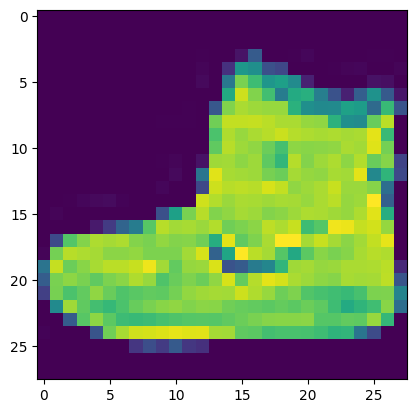

In [15]:
plt.imshow(X_train[0])

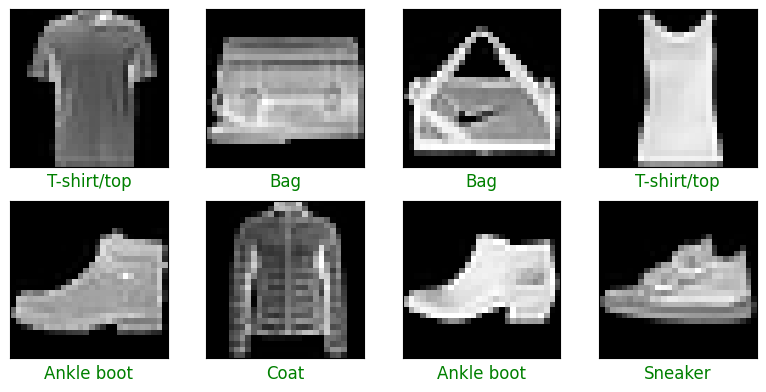

In [35]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) ->None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))

  len_x=x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]
    img_idx = random.randint(0, len_x)
    ax.imshow(x_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])

    true_label_str = f"{class_names[y_data[img_idx]]}"
    ax.set_xlabel(true_label_str, color="green", fontsize=12)

  plt.tight_layout()
  plt.show()
plot_data(X_train, y_train)

#2. Image pre-processing